## Stock Market Time Series - Preprocessing

### Import relevant libraries and data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../data/google_stock_data.csv")

In [3]:
df.head()

,Date,Open
0,1/2/2015 16:00:00,27.05
1,1/9/2015 16:00:00,26.36
2,1/16/2015 16:00:00,24.96
3,1/23/2015 16:00:00,25.64
4,1/30/2015 16:00:00,27.06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    299 non-null    object 
 1   Open    299 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


No missing data, all opening stock market values are floats. Data column needs to be changed into data format

### Transforming Data

In [5]:
#Tranform date into datetime
df.Date = pd.to_datetime(df.Date).dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    299 non-null    object 
 1   Open    299 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [6]:
# Rename open column to StockValue 
df.rename(columns={'Open': 'StockValue'}, inplace=True)
df.head()

,Date,StockValue
0,2015-01-02,27.05
1,2015-01-09,26.36
2,2015-01-16,24.96
3,2015-01-23,25.64
4,2015-01-30,27.06


### Descriptive Stats

In [7]:
df.describe()

,StockValue
count,299.000000
mean,49.159632
std,13.423871
min,24.960000
25%,38.210000
50%,51.000000
75%,58.425000
max,82.180000


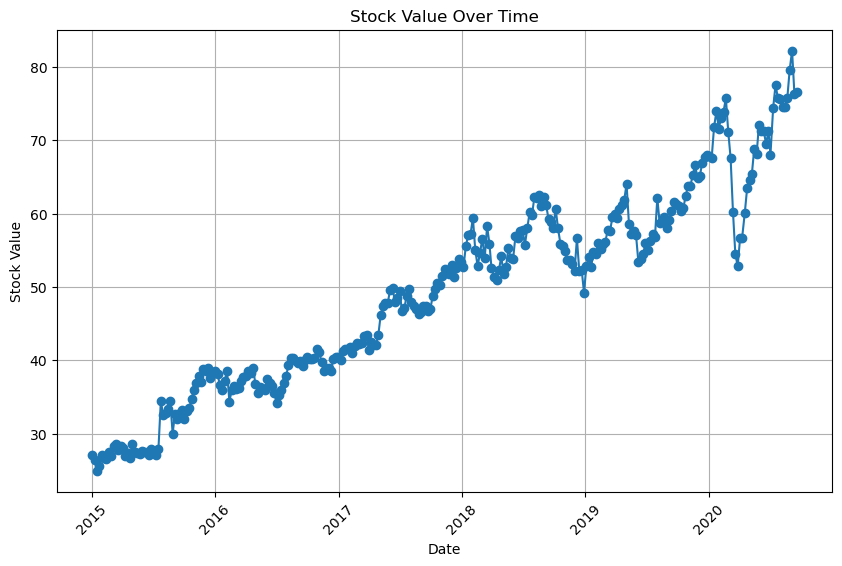

In [8]:
# Plotting
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(df['Date'], df['StockValue'], marker='o')

# Adding titles and labels
plt.title('Stock Value Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Value')

# Optional: Rotate x-axis labels if dates overlap
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid(True)

The graph gives us a first idea of the evolution of the stock values over time. As we can see, there is a clear upward trend, i.e. the data is not stationary. Also the variance seems to be increasing over time, so we should apply a log transformation to work with a constant variance 

### Log transformation 

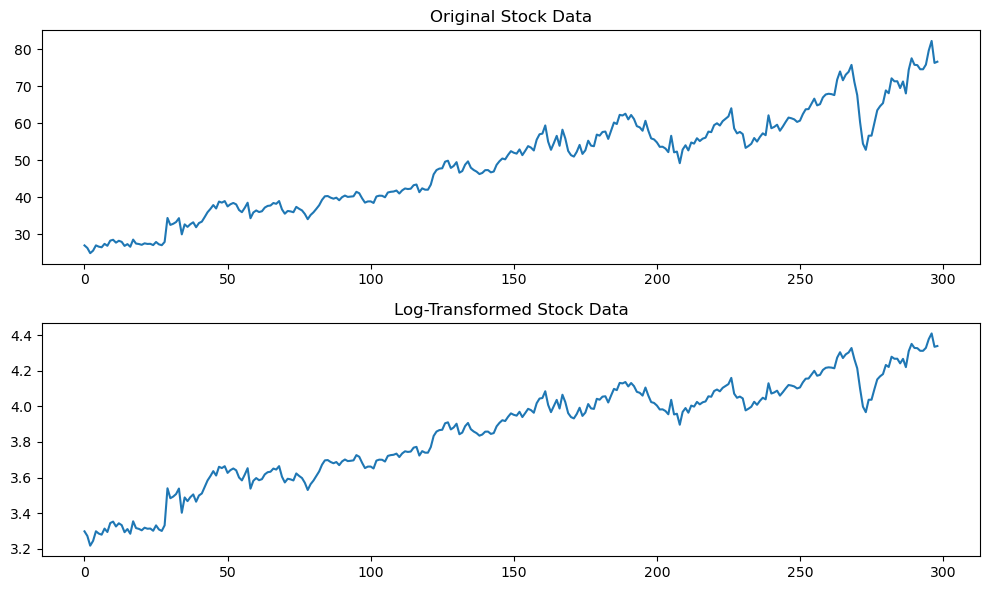

In [11]:
df['LogStockValue'] = np.log(df['StockValue'])

# Plotting the original and log-transformed data for comparison
plt.figure(figsize=(10,6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(df['StockValue'])
plt.title('Original Stock Data')

# Log-transformed data
plt.subplot(2, 1, 2)
plt.plot(df['LogStockValue'])
plt.title('Log-Transformed Stock Data')

plt.tight_layout()
plt.show()

In [13]:
df_log = df = df.drop('StockValue', axis=1)

In [14]:
df_log.to_csv('../data/log_stock_data.csv', index=False)